In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
# Feature extraction layers
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation, Dropout, BatchNormalization
# Classification layers
from tensorflow.keras.layers import Dense, Flatten

from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
class_names = []


def load_data():
  # setting class names
  class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  #loading the dataset
  (x_train,y_train),(x_test,y_test)=cifar10.load_data()
  #
  x_train=x_train/255.0
  #
  x_test=x_test/255.0

  return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

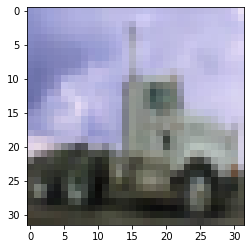

In [ ]:
plt.imshow(x_test[209])

# Data Augmentation

In [ ]:
def flip_c(image: tf.Tensor) -> tf.Tensor:
    # Randomize alignment (left/right)
    image = tf.image.random_flip_left_right(image)
    # Randomize alignment (top/down)
    image = tf.image.random_flip_up_down(image)
    # Return the randomized image
    return image

In [ ]:
def color_c(image: tf.Tensor) -> tf.Tensor:
    # Randomize hue
    image = tf.image.random_hue(image, max_delta=0.08)
    # Randomize saturation
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    # Randomize brightness
    image = tf.image.random_brightness(image, 0.05)
    # Randomize contrast
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    # Return the randomized image
    return image

In [ ]:
def rotation_c(image: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    # Return the randomized image
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

In [ ]:
def inversion_c(image: tf.Tensor) -> tf.Tensor:
  # Invert the submitted tensor
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        image = tf.math.multiply(image, -1)
        image = tf.math.add(image, 1)
    # Return the randomized image
    return image

In [ ]:
def augment_c(image, label):
  # Randomize alignment
  image = flip_c(image)
  # Randomize color (saturation/hue/brightness/contrast)
  image = color_c(image)
  # Randomize rotation
  image = rotation_c(image)
  # Randomize inversion
  image = inversion_c(image)
  # Return the fully randomized image
  return image, label

In [ ]:
x_train_a, y_train_a = augment_c(x_train, y_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


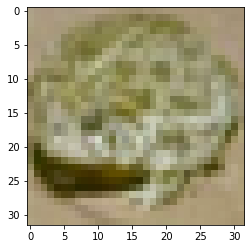

In [ ]:
plt.imshow(x_train_a[209])

# Generation of Validation data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Base-Model

In [ ]:
model1 = Sequential()

# Feature extraction with spatial convolution over images.
model1.add(Convolution2D(
  input_shape = x_train.shape[1:], # TensorShape([32, 32, 3])
  filters = 32,
  kernel_size = 3,
  activation = 'relu',
  padding = 'same',
  name = 'Conv1'
))

# Flatten layers
model1.add(Flatten(
  name = 'Flatten'
))

# Dense layer as output
model1.add(Dense(
    units = 10,
    activation = 'softmax',
    name = 'Output_Softmax'
))

In [ ]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
Flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
Output_Softmax (Dense)       (None, 10)                327690    
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


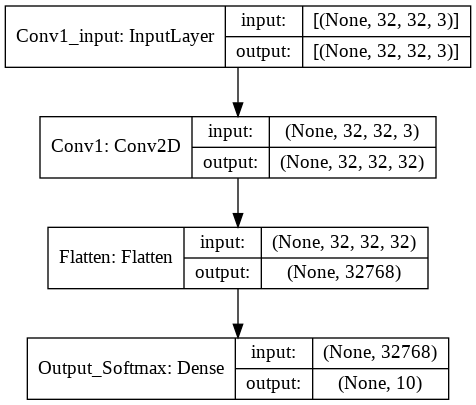

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='CNN_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile model
model1.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"], 
    optimizer = tf.keras.optimizers.SGD(lr=0.1))

In [ ]:
history1 = model1.fit(
    x=X_train,
    y=y_train,
    validation_data = (X_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1329 - accuracy: 0.2282 - val_loss: 1.7485 - val_accuracy: 0.3893
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7216 - accuracy: 0.3946 - val_loss: 1.5810 - val_accuracy: 0.4416
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4822 - accuracy: 0.4816 - val_loss: 1.6165 - val_accuracy: 0.4333
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.3755 - accuracy: 0.5256 - val_loss: 1.4858 - val_accuracy: 0.4834
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2676 - accuracy: 0.5636 - val_loss: 1.4060 - val_accuracy: 0.5192
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.2308 - accuracy: 0.5734 - val_loss: 1.4818 - val_accuracy: 0.4911
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.1852 - accuracy: 0.5925 - val_loss: 1.4501 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8953 - accuracy: 0.5037


In [ ]:
print(f'Train loss: {history1.history["loss"][-1]}')
print(f'Train accuracy: {history1.history["accuracy"][-1]}')
print(f'---------------------------------')
print(f'Validation loss: {history1.history["val_loss"][-1]}')
print(f'Validation accuracy: {history1.history["val_accuracy"][-1]}')
print(f'---------------------------------')
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Train loss: 0.7008010149002075
Train accuracy: 0.7545250058174133
---------------------------------
Validation loss: 1.8502075672149658
Validation accuracy: 0.5120999813079834
---------------------------------
Test loss: 1.8953293561935425
Test accuracy: 0.5037000179290771


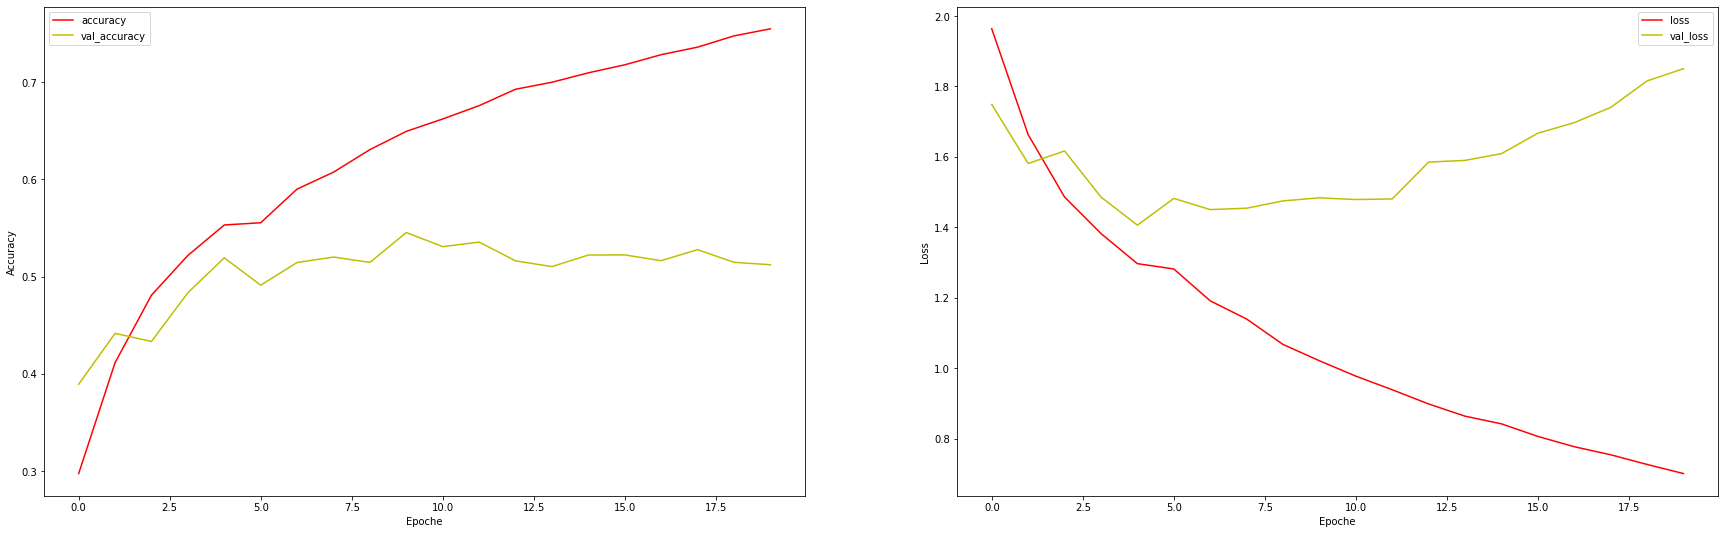

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9))

ax[0].plot(history1.history['accuracy'], label='accuracy', color='r')
ax[0].plot(history1.history['val_accuracy'], label ='val_accuracy', color='y')
ax[0].set_xlabel('Epoche')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history1.history['loss'], label='loss', color='r')
ax[1].plot(history1.history['val_loss'], label ='val_loss', color='y')
ax[1].set_xlabel('Epoche')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Advanced Base-Modell

In [ ]:
model2 = Sequential()

# Feature extraction with spatial convolution over images.
model2.add(Convolution2D(
    input_shape = x_train.shape[1:], # TensorShape([32, 32, 3])
    filters = 32,
    kernel_size = 3,
    activation = 'relu',
    padding = 'same',
    name = 'Conv1'
))

model2.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    name = 'MaxPool1'
))

# second feature extraction
model2.add(Convolution2D(
    input_shape = x_train.shape[1:], # TensorShape([32, 32, 3])
    filters = 16,
    kernel_size = 3,
    activation = 'relu',
    padding = 'same',
    name = 'Conv2'
))

model2.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    name = 'MaxPool2'
))

# Flatten layers
model2.add(Flatten(
    name = 'Flatten'
))

# Dense layer
model2.add(Dense(
    units = 120,
    activation = 'relu',
    name = 'Dense1'
))

# Dense layer
model2.add(Dense(
    units = 84,
    activation = 'relu',
    name = 'Dense2'
))

# Add a dropout layer against overfitting
#model2.add(Dropout(
#    rate = .5,
#    name = 'Dropout'
#))

# Dense layer as output
model2.add(Dense(
    units = 10,
    activation = 'softmax',
    name = 'Output_Softmax'
))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 16, 16, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 16, 16, 16)        4624      
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 8, 8, 16)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 120)               123000    
_________________________________________________________________
Dense2 (Dense)               (None, 84)               

In [ ]:
# Compile model
model2.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"], 
    optimizer = tf.keras.optimizers.SGD(lr=0.1))

In [ ]:
history2 = model2.fit(
    x=X_train,
    y=y_train,
    validation_data = (X_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9737 - accuracy: 0.2750 - val_loss: 1.4287 - val_accuracy: 0.4918
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4114 - accuracy: 0.4927 - val_loss: 1.4389 - val_accuracy: 0.5074
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2193 - accuracy: 0.5597 - val_loss: 1.2934 - val_accuracy: 0.5464
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0973 - accuracy: 0.6078 - val_loss: 1.1653 - val_accuracy: 0.5950
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9960 - accuracy: 0.6447 - val_loss: 1.0893 - val_accuracy: 0.6209
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8913 - accuracy: 0.6832 - val_loss: 1.1020 - val_accuracy: 0.6235
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8219 - accuracy: 0.7059 - val_loss: 1.0818 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6481 - accuracy: 0.6219


In [ ]:
print(f'Train loss: {history2.history["loss"][-1]}')
print(f'Train accuracy: {history2.history["accuracy"][-1]}')
print(f'---------------------------------')
print(f'Validation loss: {history2.history["val_loss"][-1]}')
print(f'Validation accuracy: {history2.history["val_accuracy"][-1]}')
print(f'---------------------------------')
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Train loss: 0.39604100584983826
Train accuracy: 0.8619499802589417
---------------------------------
Validation loss: 1.6284658908843994
Validation accuracy: 0.6337000131607056
---------------------------------
Test loss: 1.6481000185012817
Test accuracy: 0.6219000220298767


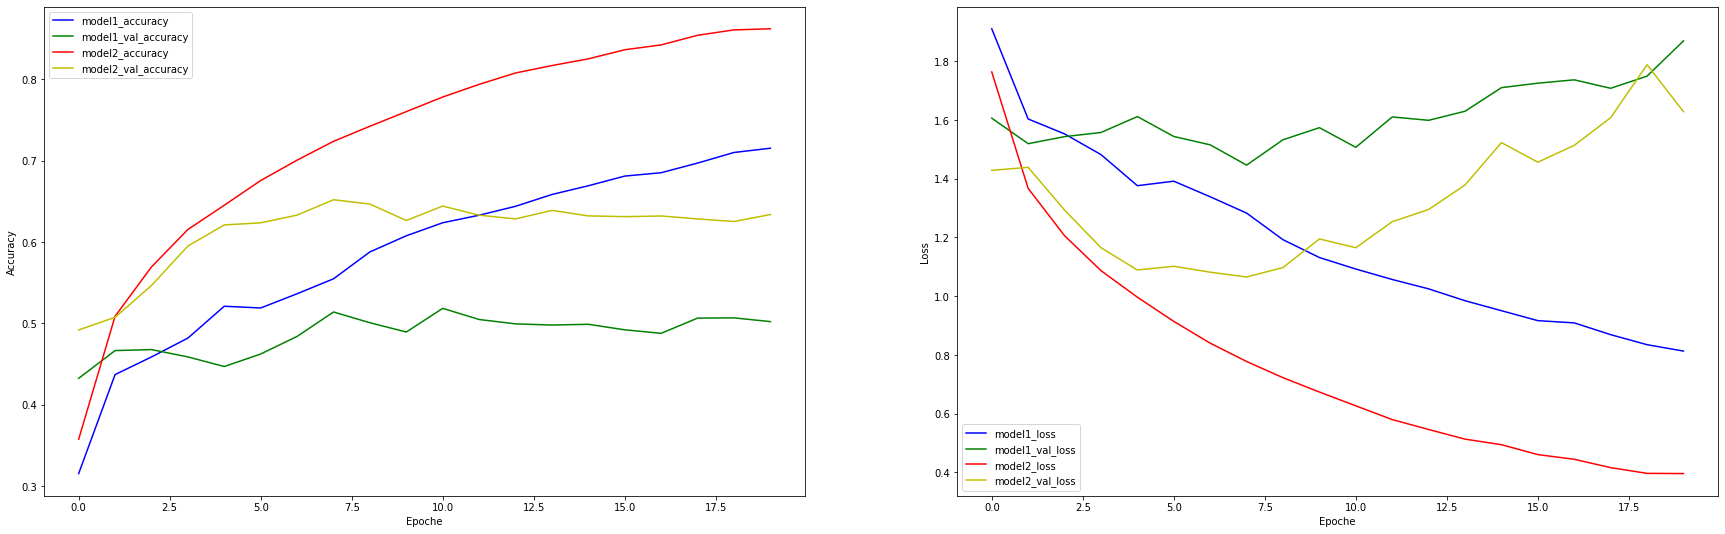

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9))

ax[0].plot(history1.history['accuracy'], label='model1_accuracy', color='b')
ax[0].plot(history1.history['val_accuracy'], label ='model1_val_accuracy', color='g')
ax[0].plot(history2.history['accuracy'], label='model2_accuracy', color='r')
ax[0].plot(history2.history['val_accuracy'], label ='model2_val_accuracy', color='y')
ax[0].set_xlabel('Epoche')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history1.history['loss'], label='model1_loss', color='b')
ax[1].plot(history1.history['val_loss'], label ='model1_val_loss', color='g')
ax[1].plot(history2.history['loss'], label='model2_loss', color='r')
ax[1].plot(history2.history['val_loss'], label ='model2_val_loss', color='y')
ax[1].set_xlabel('Epoche')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Advanced Model

In [ ]:
from keras.callbacks import LearningRateScheduler
# DECREASE LEARNING RATE BY 0.95 EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

## Convolution Layers


In [ ]:
(x_train,y_train),(x_test,y_test) = load_data()

In [ ]:
# Multi Evaluation
nets = 4
model = [0] *nets

for j in range(4):
  model[j] = Sequential()
  model[j].add(Convolution2D(
      filters = 32,
      kernel_size=5,
      padding='same',
      activation='relu',
      input_shape= x_train.shape[1:]))
  model[j].add(MaxPooling2D())
  if j>0:
      model[j].add(Convolution2D(48,kernel_size=5,padding='same',activation='relu'))
      model[j].add(MaxPooling2D())
  if j>1:
      model[j].add(Convolution2D(64,kernel_size=5,padding='same',activation='relu'))
      model[j].add(MaxPooling2D(padding='same'))
  if j>2:
      model[j].add(Convolution2D(80,kernel_size=5,padding='same',activation='relu'))
      model[j].add(MaxPooling2D(padding='same'))
  model[j].add(Flatten())
  model[j].add(Dense(256, activation='relu'))
  model[j].add(Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
for j in range(4): 
  model[j].summary()

In [ ]:
x_train.shape[1:]

(32, 32, 3)

In [ ]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# TRAIN NETWORKS
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3", "(C-P)x4"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

KeyboardInterrupt: ignored

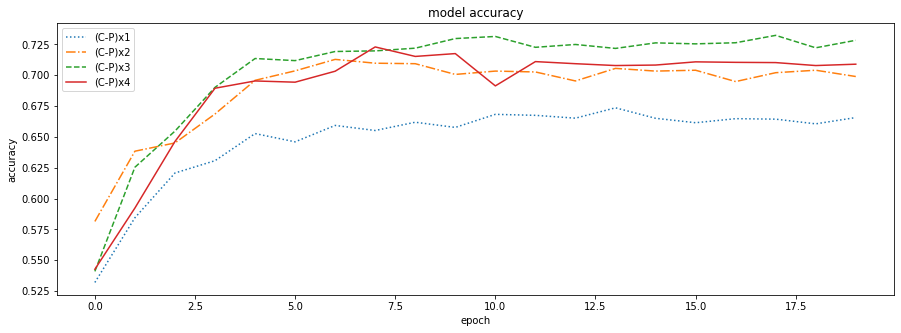

In [ ]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.98,1])
plt.show()

## Feature Maps

In [ ]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Convolution2D(
      filters = j*8+8,
      kernel_size=5,
      padding='same',
      activation='relu',
      input_shape= x_train.shape[1:]))
    model[j].add(MaxPooling2D())
    # model[j].add(Convolution2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(Convolution2D(
      filters = j*16+16,
      kernel_size=5,
      padding='same',
      activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Convolution2D(
      filters = j*24+24,
      kernel_size=5,
      padding='same',
      activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
for j in range(6):
  model[j].summary()

In [ ]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","40 maps","48 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=20, Train accuracy=0.85250, Validation accuracy=0.67650
CNN 16 maps: Epochs=20, Train accuracy=0.98397, Validation accuracy=0.70640
CNN 24 maps: Epochs=20, Train accuracy=0.99322, Validation accuracy=0.72170
CNN 32 maps: Epochs=20, Train accuracy=0.99540, Validation accuracy=0.72540
CNN 40 maps: Epochs=20, Train accuracy=0.99690, Validation accuracy=0.73570
CNN 48 maps: Epochs=20, Train accuracy=0.99690, Validation accuracy=0.73920


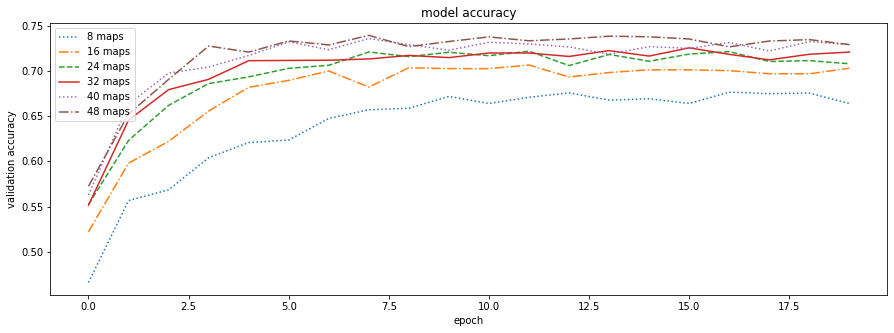

In [ ]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

We choose 32 maps, because the benefit of a much larger computation is not that impactful.

## Dense size

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Convolution2D(32,kernel_size=5, padding = 'same', activation='relu',input_shape=x_train.shape[1:]))
    model[j].add(MaxPooling2D())
    model[j].add(Convolution2D(64,kernel_size=5, padding = 'same', activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Convolution2D(96,kernel_size=5, padding = 'same', activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=20, Train accuracy=0.99510, Validation accuracy=0.71170
CNN 32N: Epochs=20, Train accuracy=0.98453, Validation accuracy=0.72220
CNN 64N: Epochs=20, Train accuracy=0.99245, Validation accuracy=0.72950
CNN 128N: Epochs=20, Train accuracy=0.99423, Validation accuracy=0.71970
CNN 256N: Epochs=20, Train accuracy=0.99545, Validation accuracy=0.73360
CNN 512N: Epochs=20, Train accuracy=0.99735, Validation accuracy=0.73340
CNN 1024N: Epochs=20, Train accuracy=0.99677, Validation accuracy=0.73170
CNN 2048N: Epochs=20, Train accuracy=0.99990, Validation accuracy=0.72700


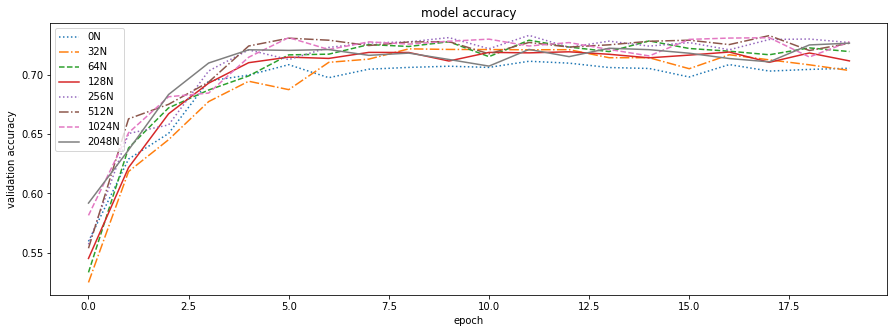

In [ ]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.60,0.75])
plt.show()

## Dropout

In [ ]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Convolution2D(32,kernel_size=5, padding = 'same', activation='relu',input_shape=x_train.shape[1:]))
    model[j].add(MaxPooling2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Convolution2D(64,kernel_size=5, padding = 'same', activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Convolution2D(96,kernel_size=5, padding = 'same', activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=20, Train accuracy=0.99427, Validation accuracy=0.72950
CNN D=0.1: Epochs=20, Train accuracy=0.94488, Validation accuracy=0.76140
CNN D=0.2: Epochs=20, Train accuracy=0.85413, Validation accuracy=0.77590
CNN D=0.3: Epochs=20, Train accuracy=0.77763, Validation accuracy=0.75990
CNN D=0.4: Epochs=20, Train accuracy=0.73362, Validation accuracy=0.75800
CNN D=0.5: Epochs=20, Train accuracy=0.67710, Validation accuracy=0.71770
CNN D=0.6: Epochs=20, Train accuracy=0.58495, Validation accuracy=0.56860
CNN D=0.7: Epochs=20, Train accuracy=0.48417, Validation accuracy=0.37420


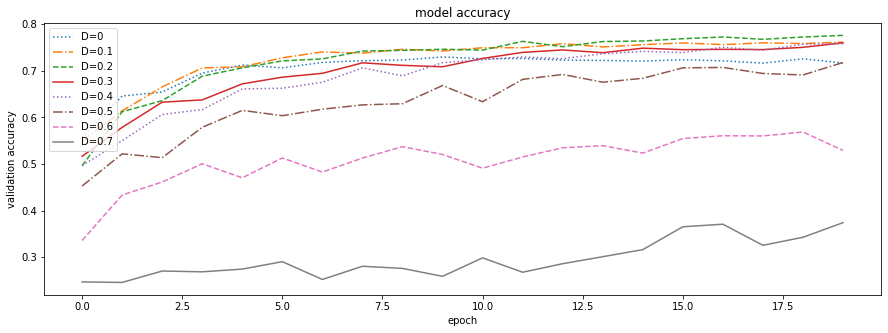

In [ ]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

# Comparison

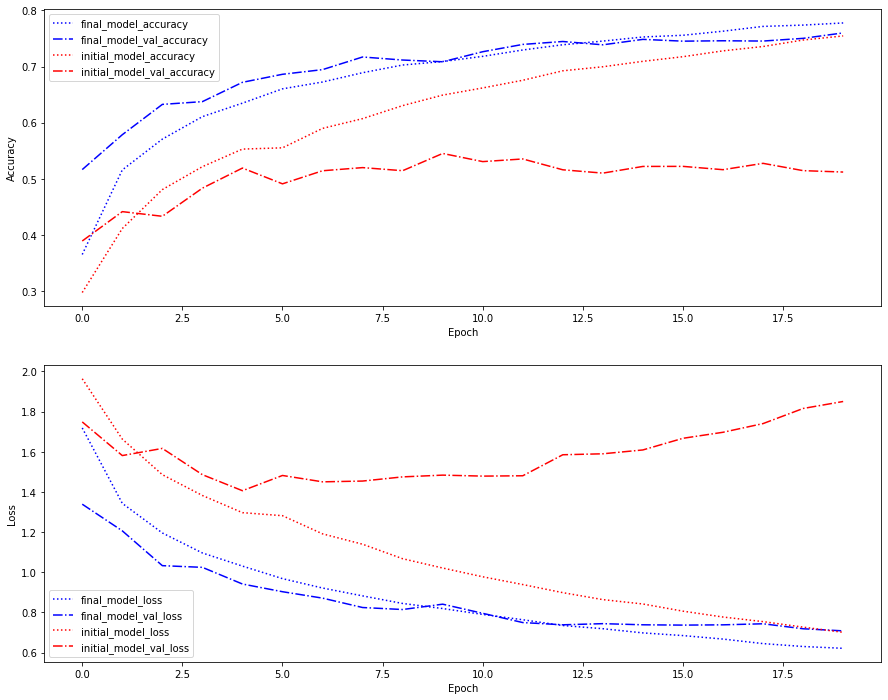

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

j = 3

ax[0].plot(history[j].history['accuracy'], label='final_model_accuracy', color='b', linestyle=':')
ax[0].plot(history[j].history['val_accuracy'], label ='final_model_val_accuracy', color='b', linestyle='-.')
ax[0].plot(history1.history['accuracy'], label='initial_model_accuracy', color='r', linestyle=':')
ax[0].plot(history1.history['val_accuracy'], label ='initial_model_val_accuracy', color='r', linestyle='-.')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history[j].history['loss'], label='final_model_loss', color='b', linestyle=':')
ax[1].plot(history[j].history['val_loss'], label ='final_model_val_loss', color='b', linestyle='-.')
ax[1].plot(history1.history['loss'], label='initial_model_loss', color='r', linestyle=':')
ax[1].plot(history1.history['val_loss'], label ='initial_model_val_loss', color='r', linestyle='-.')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()